In [162]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder


## Read more about the stroke dataset here
- https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [5]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 

## check the numerical rows
- object or string columns will need to be changed to numerical columns in order to be used for modeling


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Look for nulls in each column.

In [8]:
for column in df.columns:
    print(df[column].isnull().value_counts())

False    5110
Name: id, dtype: int64
False    5110
Name: gender, dtype: int64
False    5110
Name: age, dtype: int64
False    5110
Name: hypertension, dtype: int64
False    5110
Name: heart_disease, dtype: int64
False    5110
Name: ever_married, dtype: int64
False    5110
Name: work_type, dtype: int64
False    5110
Name: Residence_type, dtype: int64
False    5110
Name: avg_glucose_level, dtype: int64
False    4909
True      201
Name: bmi, dtype: int64
False    5110
Name: smoking_status, dtype: int64
False    5110
Name: stroke, dtype: int64


## There are nulls in the bmi column
- remove the rows that contain nulls
- we have lost some data, which in general is not a good thing,
- in the later weeks we'll revisit how to fix missing data.

In [14]:
df['bmi'].isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

In [16]:
df_null_removed = df[~df['bmi'].isnull()]
df_null_removed['bmi'].isnull().value_counts()

False    4909
Name: bmi, dtype: int64

In [27]:
## select numeric columns
numeric_cols = df_null_removed.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

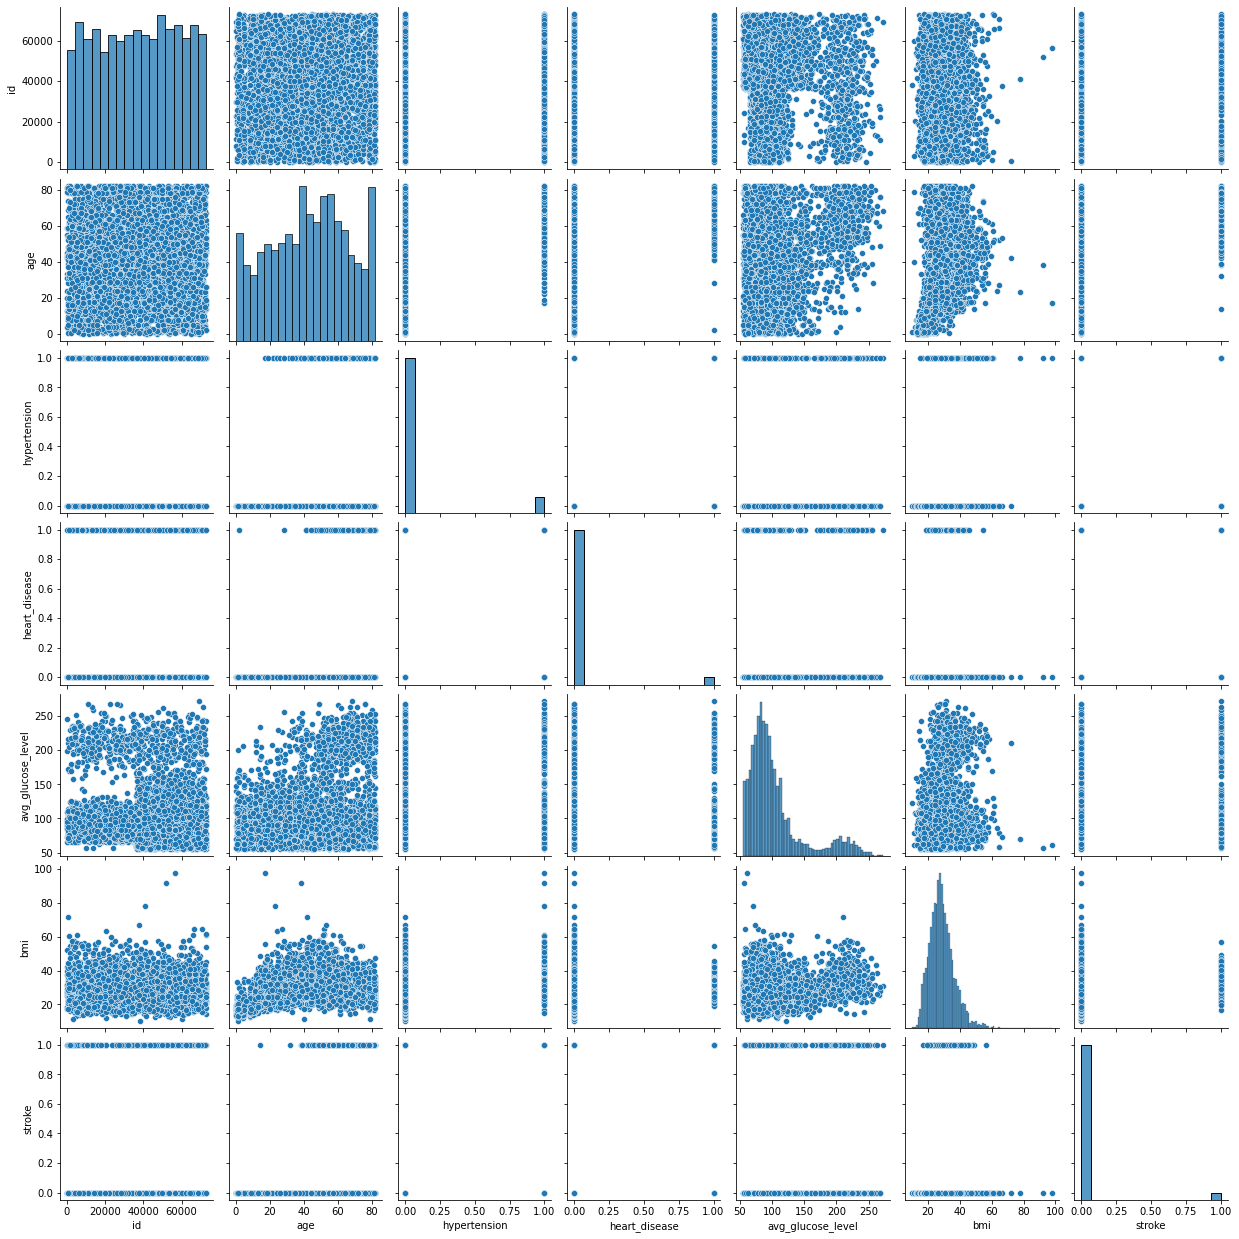

In [29]:
sns.pairplot(df_null_removed[numeric_cols])

### Does it make sense to include id column as a possible feature?
## Use logistic regression to predict  if a patient is above median or below median glucose level

In [ ]:
# get glucose median
p50 = df_null_removed['avg_glucose_level'].median()
df_null_removed['median_glucose'] = df_null_removed['avg_glucose_level'].apply(lambda x: 1 if x< p50 else 0 )

In [171]:
## Check target label ratios to check imbalance
df_null_removed['median_glucose'].value_counts()

0    2456
1    2453
Name: median_glucose, dtype: int64

## Define training columns and target columns

In [188]:
X_train, X_test, y_train, y_test  = train_test_split(X,df_null_removed['stroke'], test_size=0.30, random_state=42,stratify=df_null_removed['stroke'])

In [189]:
y_test.value_counts()

0    1410
1      63
Name: stroke, dtype: int64

In [190]:
63/1410

0.04468085106382979

In [192]:
146/3290

0.04437689969604863

In [191]:
y_train.value_counts()

0    3290
1     146
Name: stroke, dtype: int64

In [172]:
train_cols = ['age','hypertension','heart_disease','bmi']
target = ['median_glucose']

X = df_null_removed[train_cols]
y = df_null_removed[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# create logistic regression model
- set the random state in order to have repeatable results

In [173]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train.values.ravel())  #use values.ravel to deal with numpy hiccups

LogisticRegression(random_state=0)

In [174]:
y_true_train = y_train
y_preds_train = clf.predict(X_train)

accuracy = accuracy_score(y_true_train,y_preds_train)
precision = precision_score(y_true_train,y_preds_train)
recall = recall_score(y_true_train,y_preds_train)

print("metrics on the train set: accuracy",accuracy,'precision',precision,'recall',recall)

metrics on the train set: accuracy 0.5520954598370198 precision 0.5418242959226566 recall 0.7416570771001151


In [175]:
y_true = y_test
y_preds = clf.predict(X_test)

accuracy = accuracy_score(y_true,y_preds)
precision = precision_score(y_true,y_preds)
recall = recall_score(y_true,y_preds)

print('metrics on the train set: accuracy',accuracy,'precision',precision,'recall',recall)

metrics on the train set: accuracy 0.538357094365241 precision 0.5178389398572885 recall 0.7104895104895105


# Take a look at the confusion matrix
- diagonals are the true positives and the true negatives
- in order to determine which is the true positive, you need to know which index corresponds to what label.
- the indices are in sorted order of the labels.
- labels = [0,1], therefore the first index corresponds to the zeroth label, i.e the true negative
- 285 is the number of true negatives, 508 is the number of true positives.
- off diagonal elements are number of mismatches. where the true was 0 but predicted to be 1 and vice versa
- 473 is the number of those original negative but scored as positive
- 207 is the number of original positives but scored as negative


In [176]:
confusion_matrix(y_true,y_preds)

array([[285, 473],
       [207, 508]])

## Using the confusion matrix, confirm that you are able to calculate the accuracy, precision and recall
- the formulae are here https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers
- your numbers should match the number above

# Dummy Coding categorical variables
- this dataset has some categorical variables,
- we will investigate label encoding to change string/categorical variables to something numerical that model can work with
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

## dummy coding  the column ever_married


In [103]:
onne = df_null_removed[['ever_married']]
twoo = pd.get_dummies(df_null_removed,columns=['ever_married'])[['ever_married_No', 'ever_married_Yes']]

## concat two dataframes column wise, assume the indexes match on both dataframes
pd.concat([onne,twoo],axis=1).head(20)

,ever_married,ever_married_No,ever_married_Yes
0,Yes,0,1
2,Yes,0,1
3,Yes,0,1
4,Yes,0,1
5,Yes,0,1
6,Yes,0,1
7,No,1,0
9,Yes,0,1
10,Yes,0,1
11,Yes,0,1


## Note that the ever_married column has been expanded to two additional columns, 
- `ever_married_No` has 1 if married is no and 0 otherwise
- `ever_married_Yes` has 1 if married is yes and 0 otherwise

## For modeling purposes, one of these dummy columns are redundant
- if you know someone is a 1 in the no column, the yes column does not tell you more information.
- The yes and no columns are inverses of each other.  This works because the labels are mutually exclusive.  You can't be both married and non married.  
- This logic of dropping one of the columns also works when the number of labels are 3 or more as well.
- If the categories are mutually exclusive on [red, blue, green].  We only need dummy columns for 2 of these 
categories to capture all information
- Use `drop_first =True` to drop one of the redundant columns


# Putting everything together
- See the extra columns at the end

In [109]:
categorical_columns = ['ever_married','gender']
df_dummies = pd.get_dummies(df_null_removed,columns=categorical_columns,drop_first=True)


In [111]:
df_dummies.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,median_glucose,ever_married_Yes,gender_Male,gender_Other
0,9046,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,0,1,1,0
2,31112,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,0,1,1,0
3,60182,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,0,1,0,0
4,1665,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0,0
5,56669,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,0,1,1,0


In [112]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   work_type          4909 non-null   object 
 5   Residence_type     4909 non-null   object 
 6   avg_glucose_level  4909 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     4909 non-null   object 
 9   stroke             4909 non-null   int64  
 10  median_glucose     4909 non-null   int64  
 11  ever_married_Yes   4909 non-null   uint8  
 12  gender_Male        4909 non-null   uint8  
 13  gender_Other       4909 non-null   uint8  
dtypes: float64(3), int64(5), object(3), uint8(3)
memory usage: 474.6+ KB


# Train with the new dummy variables


In [127]:
train_cols = ['age','hypertension','heart_disease','bmi'] +['ever_married_Yes','gender_Male','gender_Other']
target = ['median_glucose']

X = df_dummies[train_cols]
y = df_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [128]:
clf = LogisticRegression(random_state=0,max_iter=10000,)
clf.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=10000, random_state=0)

In [130]:
y_true = y_test
y_preds = clf.predict(X_test)

accuracy = accuracy_score(y_true,y_preds)
precision = precision_score(y_true,y_preds)
recall = recall_score(y_true,y_preds)

print('accuracy',accuracy,'precision',precision,'recall',recall)

print("confusion matrix")
confusion_matrix(y_true,y_preds)

accuracy 0.5553292600135777 precision 0.532608695652174 recall 0.6853146853146853
confusion matrix


array([[328, 430],
       [225, 490]])

# slighty better accruacy and precision values, but the recall has decreased

# Scaling Numerical Variables
- Regression models have trouble with numerical columns that lie on different scales
- `age` variable have values in the 10's while `hypertension` have values in the 1's
- Scaling the numerical columns so that they lie on the same scale often used. 
- there are variety of ways of scaling variables, standardizing is the most common i.e bring numbers to zero mean and unit variance

In [134]:
df_dummies[['age','bmi']].describe()

,age,hypertension
count,4909.000000,4909.000000
mean,42.865374,0.091872
std,22.555115,0.288875
min,0.080000,0.000000
25%,25.000000,0.000000
50%,44.000000,0.000000
75%,60.000000,0.000000
max,82.000000,1.000000


## subtract the mean and divide by the standard deviation for each row
- we won't scale `heart_disease` or `hypertension` because they are already on the 0-1 scale

In [145]:
df_dummies['age_scaled'] = (df_dummies['age'] - df_dummies['age'].mean())/df_dummies['age'].std()
df_dummies['bmi_scaled'] = (df_dummies['bmi'] - df_dummies['bmi'].mean())/df_dummies['bmi'].std()

# Note the mean and standard deviation between the scaled and unscaled columns

In [146]:
df_dummies[['age','age_scaled','bmi','bmi_scaled']].describe()

,age,age_scaled,bmi,bmi_scaled
count,4909.000000,4.909000e+03,4909.000000,4.909000e+03
mean,42.865374,-9.526879e-16,28.893237,-1.405566e-15
std,22.555115,1.000000e+00,7.854067,1.000000e+00
min,0.080000,-1.896926e+00,10.300000,-2.367339e+00
25%,25.000000,-7.920764e-01,23.500000,-6.866808e-01
50%,44.000000,5.030461e-02,28.100000,-1.009970e-01
75%,60.000000,7.596781e-01,33.100000,5.356159e-01
max,82.000000,1.735067e+00,97.600000,8.747922e+00


In [147]:
train_cols = ['age_scaled','hypertension','heart_disease','bmi_scaled'] +['ever_married_Yes','gender_Male','gender_Other']
target = ['median_glucose']

X = df_dummies[train_cols]
y = df_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

clf = LogisticRegression(random_state=0,max_iter=10000,)
clf.fit(X_train,y_train.values.ravel())


y_true = y_test
y_preds = clf.predict(X_test)

accuracy = accuracy_score(y_true,y_preds)
precision = precision_score(y_true,y_preds)
recall = recall_score(y_true,y_preds)

print('accuracy',accuracy,'precision',precision,'recall',recall)

print("confusion matrix")
confusion_matrix(y_true,y_preds)

accuracy 0.5560081466395111 precision 0.5331882480957563 recall 0.6853146853146853
confusion matrix


array([[329, 429],
       [225, 490]])

# Putting everything together with sklearn pipelines.
- sklearn has functions for standardizing and dummy coding
- We would have to do the transformations on each of the columns seperately and then put the transformed columns back together.
- You can imagine that gets really complicated quickly
- Thankfully sklearn has pipelines api, to define a data transformation flow
- Below is an example.

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

https://scikit-learn.org/stable/auto_examples/linear_model/plot_tweedie_regression_insurance_claims.html#sphx-glr-auto-examples-linear-model-plot-tweedie-regression-insurance-claims-py

In [166]:
# use the original dataframe with nulls removed.
X = df_null_removed.copy()
y = df_null_removed[target]

# define the numerical columns to be scaled 
numeric_features_scale = ["age", "bmi"]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

# define the numerical columns to pass through, no transformations
other_numeric_features = ['hypertension','heart_disease']
pass_columns = Pipeline(steps=[("passthrough_numeric", "passthrough")])

# define the columns for dummy coding
categorical_features = ["ever_married", "gender"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")  


# note  the remainder=drop, we are passing the entire dataframe in the beginning, 
# any columns not explicitly mentioned will be dropped

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_scale),
        ("cat", categorical_transformer, categorical_features),
        ("pass", pass_columns, other_numeric_features),
    ], remainder="drop",
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=10000))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# here clf not only fits the model, but does the column transformations as well
clf.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ever_married', 'gender']),
                                                 ('pass',
                                                  Pipeline(steps=[('passthrough_numeric',
                                                                   'passthrough')]),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

# Test the pipeline and Check results

In [168]:
y_true = y_test
y_preds = clf.predict(X_test)

accuracy = accuracy_score(y_true,y_preds)
precision = precision_score(y_true,y_preds)
recall = recall_score(y_true,y_preds)

print('accuracy',accuracy,'precision',precision,'recall',recall)

print("confusion matrix")
confusion_matrix(y_true,y_preds)

accuracy 0.5560081466395111 precision 0.5331882480957563 recall 0.6853146853146853
confusion matrix


array([[329, 429],
       [225, 490]])